In [1]:
import numpy as np
# bmp 图片后缀
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

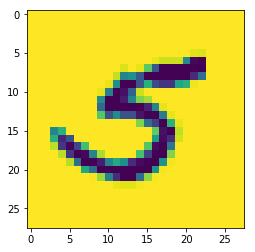

In [73]:
#查看图片文件，显示图片
n = np.random.randint(1,100,size=(1,))[0]
img = plt.imread('./data/5/5_'+str(n)+'.bmp')
plt.imshow(img)

In [74]:
img.shape

(28, 28)

提炼样本数据

In [25]:
digsts = []
target = []
for i in range(0,10):
    for j in range(1,501):
        path = format('./data/%d/%d_%d.bmp'%(i,i,j))
        img_data = plt.imread(path)
        digsts.append(img_data)
        target.append(i)
    
    

In [27]:
feature = np.array(digsts)
target = np.array(target)

将样本打乱

In [30]:
np.random.seed(10)
np.random.shuffle(feature)
np.random.seed(10)
np.random.shuffle(target)

获取训练数据和测试数据

In [44]:
x_train = feature[:4950]
y_train = target[:4950]
x_test = feature[4950:]
y_test = target[4950:]

实例化模型对象，训练

In [53]:
x_train.shape

(4950, 28, 28)

In [51]:
knn = KNeighborsClassifier(n_neighbors=50)

In [52]:
knn.fit(x_train,y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [59]:
x_train = x_train.reshape(4950,28*28)
x_test = x_test.reshape(50,28*28)

In [118]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [119]:
x_train.shape

(4950, 784)

In [60]:
knn.predict(x_test)

array([1, 2, 2, 3, 9, 1, 7, 9, 8, 5, 5, 4, 9, 0, 7, 0, 1, 6, 6, 7, 2, 7,
       1, 1, 0, 8, 8, 6, 1, 1, 6, 6, 4, 4, 0, 3, 5, 8, 8, 2, 4, 3, 3, 9,
       4, 1, 1, 2, 9, 2])

In [61]:
y_test

array([1, 2, 2, 3, 9, 1, 7, 9, 8, 5, 5, 4, 9, 0, 7, 0, 3, 5, 0, 7, 2, 7,
       1, 2, 0, 8, 8, 6, 1, 1, 6, 6, 4, 4, 0, 8, 5, 8, 2, 2, 4, 3, 3, 9,
       4, 2, 6, 2, 9, 2])

In [62]:
knn.score(x_train,y_train)

0.9018181818181819

In [130]:
a = np.array([[[1,2],[3,2]],[[3,4],[4,5]]])
a

array([[[1, 2],
        [3, 2]],

       [[3, 4],
        [4, 5]]])

In [131]:
a.mean(axis=2)

array([[1.5, 2.5],
       [3.5, 4.5]])

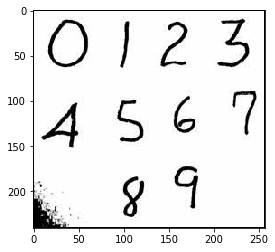

In [138]:
img_data = plt.imread('./数字.jpg')
# img_data = img_data.mean(axis = 2)

plt.imshow(img_data)

In [139]:
img_data.shape

(241, 257, 3)

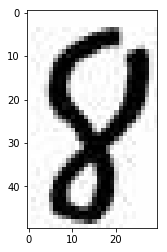

In [146]:
eight = img_data[180:230,95:125]
plt.imshow(eight)

In [147]:
eight.shape

(50, 30, 3)

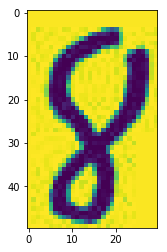

In [148]:
eight = eight.mean(axis=2)
plt.imshow(eight)

In [127]:
eight.shape

(50, 30)

In [113]:
import scipy.ndimage as ndimage
eight = ndimage.zoom(eight,zoom = (28/50,28/30))

In [117]:
eight.shape

(28, 28)

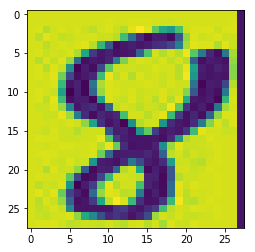

In [121]:
plt.imshow(eight)

In [149]:
knn.predict(eight.reshape(1,28*28))

ValueError: cannot reshape array of size 1500 into shape (1,784)